<a href="https://colab.research.google.com/github/P-lavanya16/30DaysOfJavaScript/blob/main/PUVVALA_LAVANYA_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

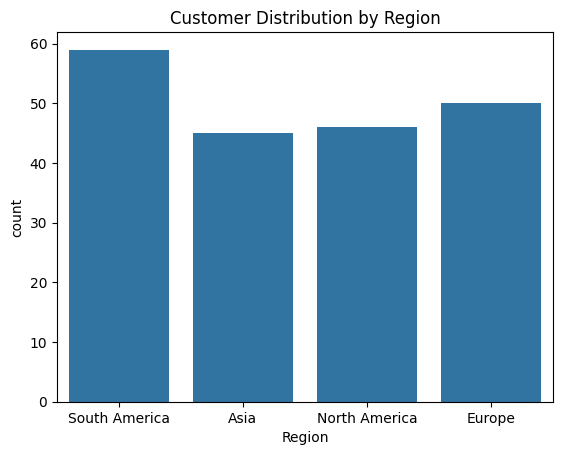

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Region-wise distribution
sns.countplot(x='Region', data=customers)
plt.title("Customer Distribution by Region")
plt.show()


In [3]:
top_products = transactions['ProductID'].value_counts().head(10)
print(top_products)


ProductID
P059    19
P029    17
P062    16
P079    16
P054    16
P061    16
P048    15
P022    15
P096    15
P049    15
Name: count, dtype: int64


Step 2: Perform EDA
Analyze each dataset systematically.

1. Customer Data
Missing Values: Check if any data is missing.
Region Distribution: Analyze where customers are located.
Signup Trends: Check when customers are signing up.

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


<ipython-input-4-0467f68ba985>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=customers, palette='viridis')


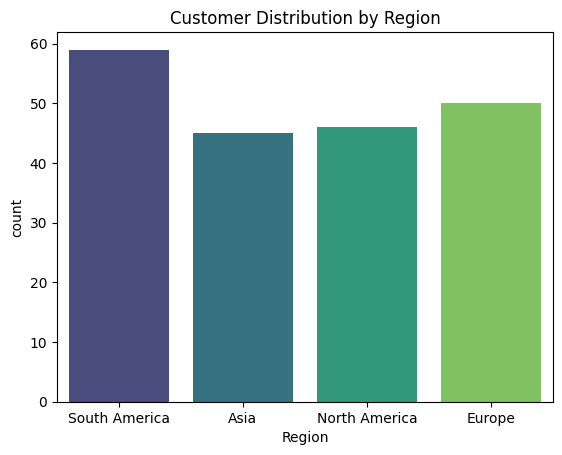

<ipython-input-4-0467f68ba985>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SignupYear', data=customers, palette='cool')


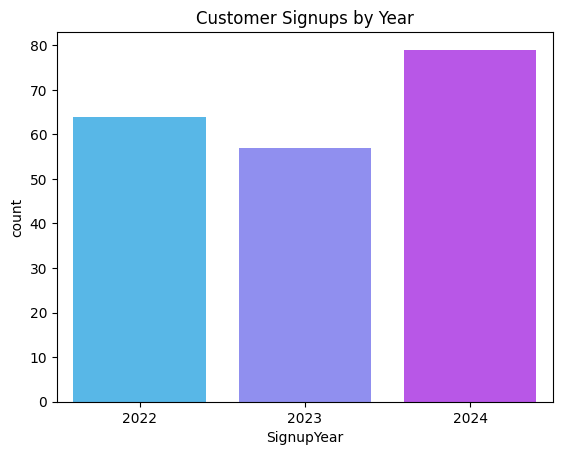

In [4]:
# Check for missing values
print(customers.isnull().sum())

# Plot region distribution
sns.countplot(x='Region', data=customers, palette='viridis')
plt.title("Customer Distribution by Region")
plt.show()

# Analyze signup trends
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupYear'] = customers['SignupDate'].dt.year
sns.countplot(x='SignupYear', data=customers, palette='cool')
plt.title("Customer Signups by Year")
plt.show()


2. Product Data
Top Categories: Find the most common product categories.
Price Distribution: Analyze the price range of products.

<ipython-input-5-417170d75c56>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=products, order=products['Category'].value_counts().index, palette='rocket')


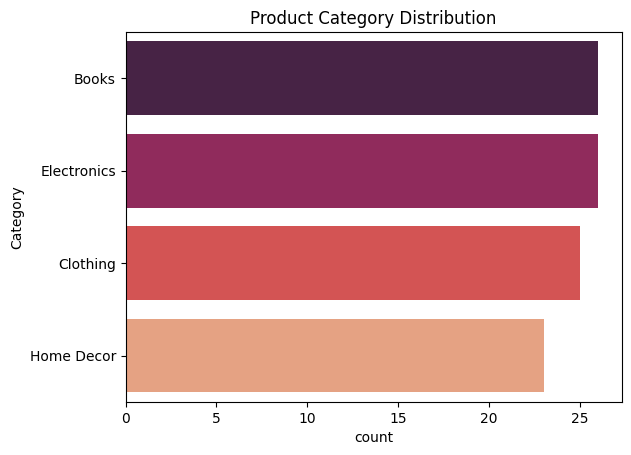

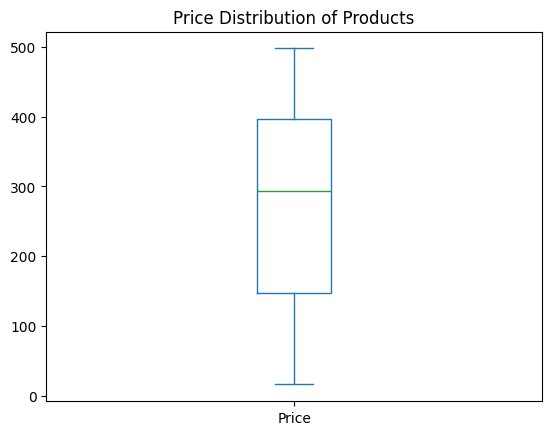

In [5]:
# Plot category distribution
sns.countplot(y='Category', data=products, order=products['Category'].value_counts().index, palette='rocket')
plt.title("Product Category Distribution")
plt.show()

# Price distribution
products['Price'].plot(kind='box')
plt.title("Price Distribution of Products")
plt.show()


3. Transaction Data
Top Products: Which products are sold the most?
Sales Over Time: Are there seasonal trends in transactions?
Revenue Analysis: Which products or customers generate the highest revenue?

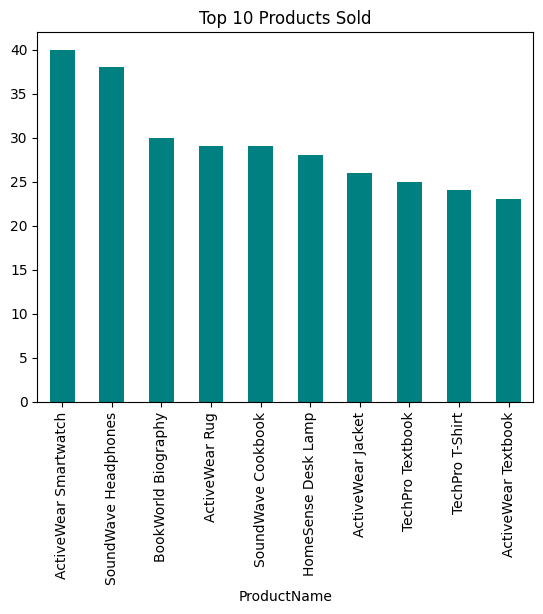

KeyError: 'Price'

In [6]:
# Merge transactions with products
transactions_products = transactions.merge(products, on='ProductID')

# Top 10 products by sales
top_products = transactions_products['ProductName'].value_counts().head(10)
top_products.plot(kind='bar', color='teal')
plt.title("Top 10 Products Sold")
plt.show()

# Revenue over time
transactions_products['TransactionDate'] = pd.to_datetime(transactions_products['TransactionDate'])
transactions_products['Revenue'] = transactions_products['Quantity'] * transactions_products['Price']
transactions_products.groupby(transactions_products['TransactionDate'].dt.to_period("M"))['Revenue'].sum().plot(kind='line', color='orange')
plt.title("Monthly Revenue Over Time")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')